# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
Data on the COVID-19 pandemic in Portugal (2020), https://github.com/dssg-pt/covid19pt-data
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Dat

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
Data on the COVID-19 pandemic in Portugal (2020), https://github.com/dssg-pt/covid19pt-data
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Dat

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
224757,2020-09-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224758,2020-09-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224759,2020-09-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224760,2020-09-18,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224761,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
224757,2020-09-15,Colombia,Vichada,14,0,0,14
224758,2020-09-16,Colombia,Vichada,14,0,0,14
224759,2020-09-17,Colombia,Vichada,14,0,0,14
224760,2020-09-18,Colombia,Vichada,14,0,0,14
224761,2020-09-19,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
180,2020-09-15,23274,2540,386,20348
181,2020-09-16,23437,2445,389,20603
182,2020-09-17,23608,2382,389,20837
183,2020-09-18,23828,2417,390,21021
184,2020-09-19,24046,2635,390,21021


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-15,29321744,8515266,931328,19875150,0.015881,0.338915,0.044761
2020-09-16,29620077,8583569,936909,20099599,0.015815,0.339290,0.044537
2020-09-17,29924362,8677131,942181,20305050,0.015743,0.339273,0.044344
2020-09-18,30233353,8730963,947749,20554641,0.015674,0.339933,0.044076
2020-09-19,30233971,8800934,947751,20485286,0.015674,0.338779,0.044219


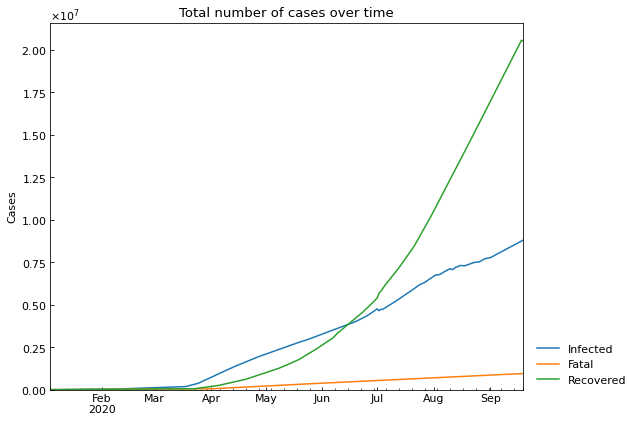

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
219,2020-09-15,76470,7208,1467,67795
220,2020-09-16,77021,7038,1480,68503
221,2020-09-17,77512,6800,1489,69223
222,2020-09-18,78084,6720,1499,69865
223,2020-09-19,78685,77184,1501,68934


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
217,2020-09-15,75958,6676,1451,67831
218,2020-09-16,76448,6455,1461,68532
219,2020-09-17,77009,6283,1473,69253
220,2020-09-18,77494,6113,1482,69899
221,2020-09-19,78073,6083,1495,70495


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
224757,2020-09-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224758,2020-09-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224759,2020-09-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224760,2020-09-18,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224761,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
204588,COL,Colombia,Vichada,2020-09-15,107808
204589,COL,Colombia,Vichada,2020-09-16,107808
204590,COL,Colombia,Vichada,2020-09-17,107808
204591,COL,Colombia,Vichada,2020-09-18,107808
204592,COL,Colombia,Vichada,2020-09-19,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
224757,2020-09-15,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224758,2020-09-16,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224759,2020-09-17,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224760,2020-09-18,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
224761,2020-09-19,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
224757,2020-09-15,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
224758,2020-09-16,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
224759,2020-09-17,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
224760,2020-09-18,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
224761,2020-09-19,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
255,2020-09-15,1,1,1,0,0,1,1,3,2,2,1,37.04
256,2020-09-16,1,1,1,0,0,1,1,3,2,2,1,37.04
257,2020-09-17,1,1,1,0,0,1,1,3,2,2,1,37.04
258,2020-09-18,1,1,1,0,0,1,1,3,2,2,1,37.04
259,2020-09-19,1,1,1,0,0,1,1,3,2,2,1,37.04


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
255,2020-09-15,1,1,1,0,0,1,1,3,2,2,1,37.04
256,2020-09-16,1,1,1,0,0,1,1,3,2,2,1,37.04
257,2020-09-17,1,1,1,0,0,1,1,3,2,2,1,37.04
258,2020-09-18,1,1,1,0,0,1,1,3,2,2,1,37.04
259,2020-09-19,1,1,1,0,0,1,1,3,2,2,1,37.04


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

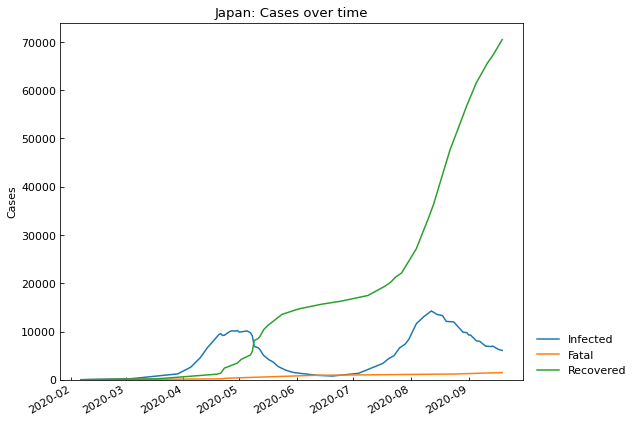

,Date,Confirmed,Infected,Fatal,Recovered
217,2020-09-15,75958,6676,1451,67831
218,2020-09-16,76448,6455,1461,68532
219,2020-09-17,77009,6283,1473,69253
220,2020-09-18,77494,6113,1482,69899
221,2020-09-19,78073,6083,1495,70495


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

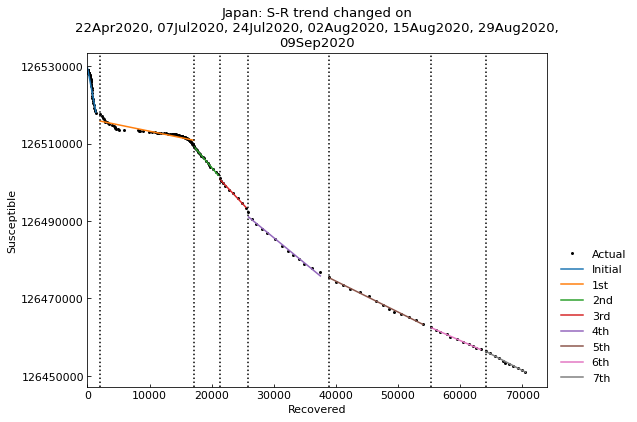

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,06Jul2020,126529100
2nd,Past,07Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,28Aug2020,126529100
6th,Past,29Aug2020,08Sep2020,126529100
7th,Past,09Sep2020,19Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	7th phase (09Sep2020 - 19Sep2020): finished  742 trials in 0 min 20 sec

	2nd phase (07Jul2020 - 23Jul2020): finished  266 trials in 0 min  5 sec

	3rd phase (24Jul2020 - 01Aug2020): finished 1032 trials in 0 min 25 sec

	5th phase (15Aug2020 - 28Aug2020): finished  685 trials in 0 min 15 sec

	6th phase (29Aug2020 - 08Sep2020): finished  258 trials in 0 min  5 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1990 trials in 1 min  0 sec

	1st phase (22Apr2020 - 06Jul2020): finished 1982 trials in 1 min  0 sec

	4th phase (02Aug2020 - 14Aug2020): finished 2028 trials in 1 min  0 sec

Completed optimization. Total: 1 min 25 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.66,0.018341,0.000174,0.104200,0.021769,1440,0.018,5760,9,45,0.937856,1990,1 min 0 sec
1st,Past,22Apr2020,06Jul2020,126529100,SIR-F,0.41,0.094355,0.000373,0.030364,0.067402,1440,0.094,2681,32,14,0.890362,1982,1 min 0 sec
2nd,Past,07Jul2020,23Jul2020,126529100,SIR-F,1.93,0.000466,0.000080,0.133382,0.068954,1440,0.000,12426,7,14,0.031898,266,0 min 5 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.84,0.000726,0.000120,0.134241,0.072807,1440,0.001,8341,7,13,0.019265,1032,0 min 25 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.58,0.000627,0.000316,0.103524,0.064959,1440,0.001,3163,9,15,0.061572,2028,1 min 0 sec
5th,Past,15Aug2020,28Aug2020,126529100,SIR-F,0.82,0.000562,0.000900,0.078347,0.094316,1440,0.001,1111,12,10,0.021244,685,0 min 15 sec
6th,Past,29Aug2020,08Sep2020,126529100,SIR-F,0.71,0.020188,0.000164,0.062044,0.085037,1440,0.020,6106,16,11,0.016830,258,0 min 5 sec
7th,Past,09Sep2020,19Sep2020,126529100,SIR-F,0.83,0.017219,0.000076,0.089347,0.105570,1440,0.017,13204,11,9,0.015724,742,0 min 20 sec


### Accuracy of estimation

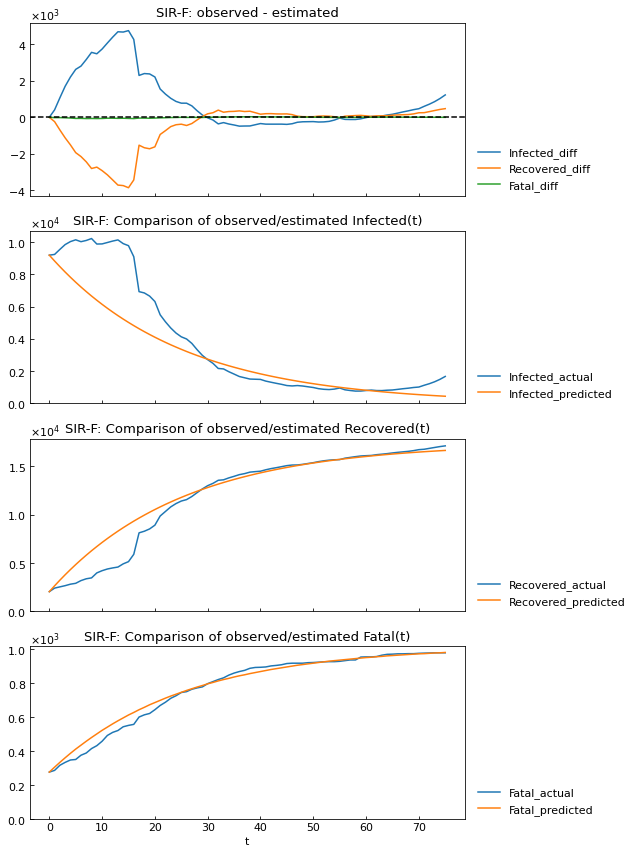

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.58

### Show parameter history

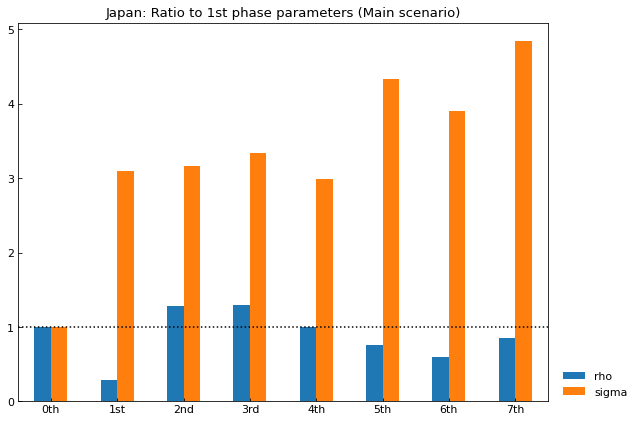

,0th,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.291405,1.280058,1.288302,0.993514,0.751896,0.595434,0.857459
sigma,1.0,3.096271,3.167561,3.344587,2.984045,4.332645,3.906381,4.849628


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

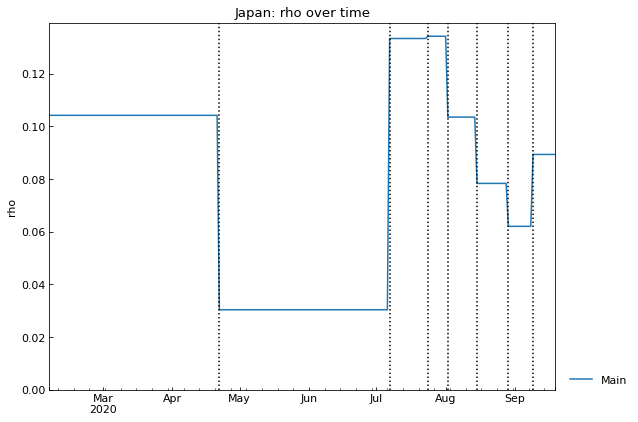

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

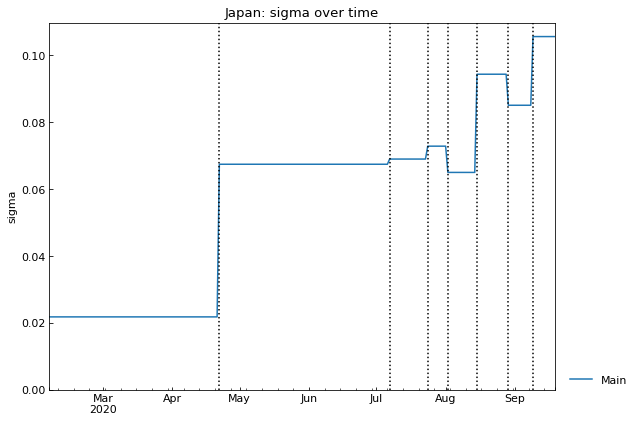

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

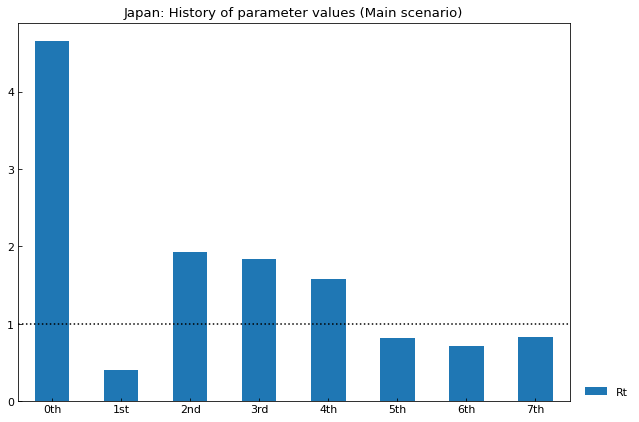

,0th,1st,2nd,3rd,4th,5th,6th,7th
Rt,4.66,0.41,1.93,1.84,1.58,0.82,0.71,0.83


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

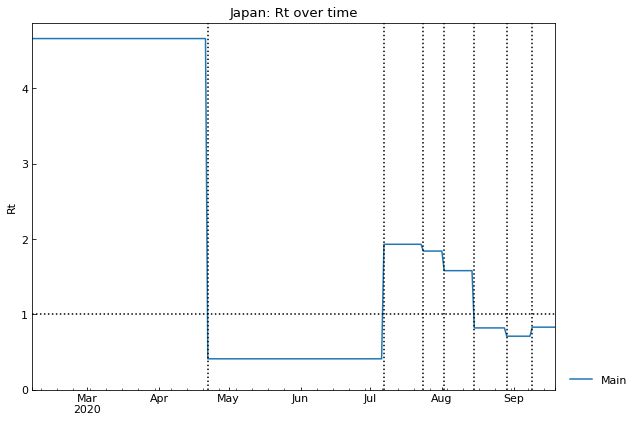

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

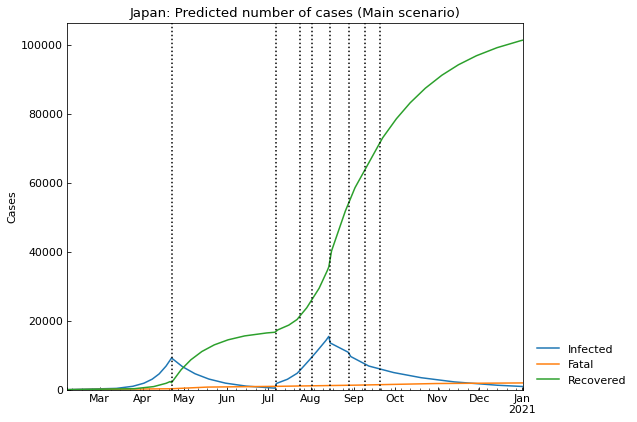

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,103855,1956,993,100906
328,2020-12-30,103942,1957,975,101010
329,2020-12-31,104029,1959,958,101112
330,2021-01-01,104114,1961,941,101212
331,2021-01-02,104196,1962,924,101310


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.10557018881749733

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.21114037763499466

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.41   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.93   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.58   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.82   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.71   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.83   
         8th    Future  20Sep2020  01Jan2021   126529100  SIR-F  0.83   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  06Jul2020   126529100  SIR-F  0.41   
         2nd      Past  07Jul2020  23Jul2020   126529100  SIR-F  1.93   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.58   
         5th      Past  15Aug2020  28Aug2020   126529100  SIR-F  0.82   
         6th      Past  29Aug2020  08Sep2020   126529100  SIR-F  0.71   
         7th      Past  09Sep2020  19Sep2020   126529100  SIR-F  0.83   
         8th    Future  20Sep2020  19Oct2020   126529100  SIR-F  0.83   
         9th    Future  20Oct2020  01Jan2021   126529100  SIR-F  0.42   

                   theta     kappa       rho     sigma   tau  alpha1 [-]  \
Scenario Phase                                                             
Main     0th    0.018341  0.000174  0.104200  0.021769  1440       0.018   
         1st    0.094355  0.000373  0.030364  0.067402  1440       0.094   
         2nd    0.000466  0.000080  0.133382  0.068954  1440       0.000   
         3rd    0.000726  0.000120  0.134241  0.072807  1440       0.001   
         4th    0.000627  0.000316  0.103524  0.064959  1440       0.001   
         5th    0.000562  0.000900  0.078347  0.094316  1440       0.001   
         6th    0.020188  0.000164  0.062044  0.085037  1440       0.020   
         7th    0.017219  0.000076  0.089347  0.105570  1440       0.017   
         8th    0.017219  0.000076  0.089347  0.105570  1440       0.017   
Medicine 0th    0.018341  0.000174  0.104200  0.021769  1440       0.018   
         1st    0.094355  0.000373  0.030364  0.067402  1440       0.094   
         2nd    0.000466  0.000080  0.133382  0.068954  1440       0.000   
         3rd    0.000726  0.000120  0.134241  0.072807  1440       0.001   
         4th    0.000627  0.000316  0.103524  0.064959  1440       0.001   
         5th    0.000562  0.000900  0.078347  0.094316  1440       0.001   
         6th    0.020188  0.000164  0.062044  0.085037  1440       0.020   
         7th    0.017219  0.000076  0.089347  0.105570  1440       0.017   
         8th    0.017219  0.000076  0.089347  0.105570  1440       0.017   
         9th    0.017219  0.000076  0.089347  0.211140  1440       0.017   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     0th              5760             9             45   0.937856   1990   
         1st              2681            32             14   0.890362   1982   
         2nd             12426             7             14  0.0318977    266   
         3rd              8341             7             13  0.0192649   1032   
         4th              3163             9             15  0.0615721   2028   
         5th              1111            12             10   0.021244    685   
         6th              6106            16             11  0.0168298    258   
         7th             13204            11              9  0.0157236    742   
         8th             13204            11              9          -      -

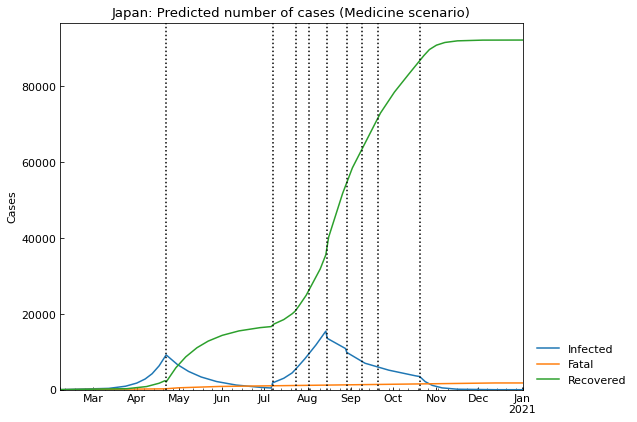

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,94000,1777,1,92222
328,2020-12-30,94000,1777,1,92222
329,2020-12-31,93999,1777,0,92222
330,2021-01-01,93999,1777,0,92222
331,2021-01-02,93999,1777,0,92222


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,9th_Rt
Main,15445,14Aug2020,924,1962,-
Medicine,15445,14Aug2020,0,1777,0.42


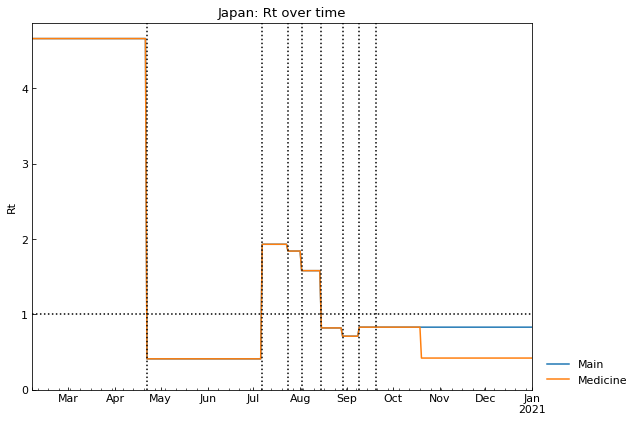

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

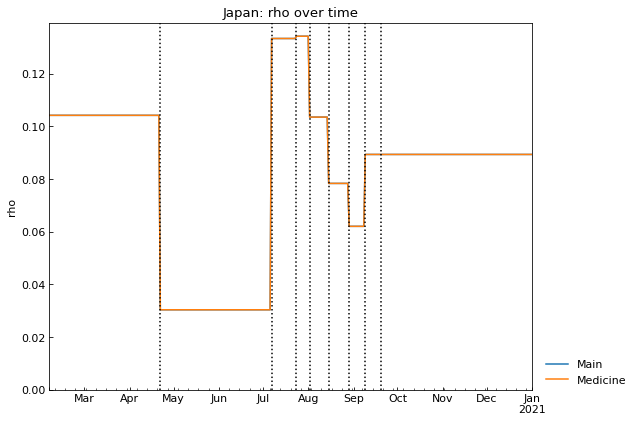

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

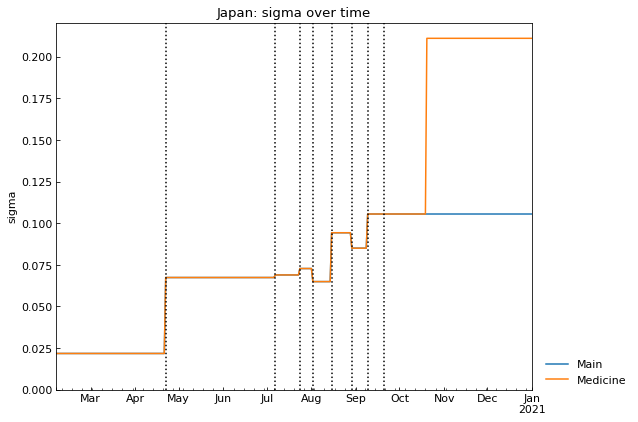

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

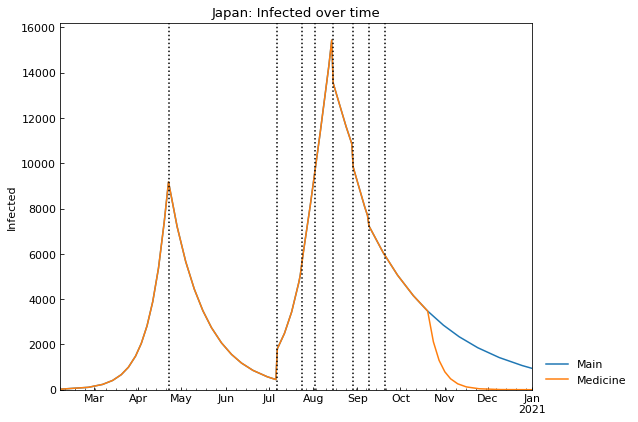

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")